# Task 8. Practical analysis of advanced algorithms

Choose two algorithms (interesting to you and not considered in the course).

Analyse the chosen algorithms in terms of time and space complexity, design technique used, etc. Implement the algorithms and produce several experiments. Analyse the results.

In [13]:
from time import process_time
import numpy as np
import matplotlib.pyplot as plt
from collections.abc import Callable
from typing import Any
from functools import partial
from scipy.optimize import curve_fit
from numpy import random
import random

In [12]:
import random

def vector(n: int) -> list[float]:
    return [random.uniform(0, 1) for _ in range(n)]

# Returns an array where each element represents the execution time of the given function
def measure(n: int, fn: Callable[[list[float]], Any]) -> list[float]:
    # For each iteration k:
    #                       1) Generate vector of length k
    #                       2) Measure current CPU time
    #                       3) Evaluate function
    #                       4) Measure current CPU time
    tmp = [[v := vector(k), process_time(), fn(v, len(v)), process_time()] for k in range(1, n)]
    
    # CPU time diff
    return [each[3] - each[1] for each in tmp]

def metrics(times: int, measure_fn: Callable[[], list[float]]) -> list[float]:
    measurements = np.array([measure_fn() for _ in range(times)])
    
    return {
        'measurements': measurements,
        'average': np.average(measurements, axis=0),
        'median': np.median(measurements, axis=0),
        'variance': np.var(measurements, axis=0)
    }

def plot(metrics: dict, theoretical: Callable) -> None:
    x = range(1, len(metrics['average']) + 1)
    
    # Find parameters for theoretical approximation function O
    args, _ = curve_fit(theoretical, x, metrics['average'])
    theoretical_values = theoretical(x, *args)
    
    fig = plt.figure(figsize=(15, 5), dpi=100)
    ax = fig.add_subplot(1, 2, 1)
    ax.plot(metrics['average'], label='Average')
    ax.plot(metrics['median'], label='Median', linestyle='dotted')
    ax.plot(theoretical_values, label='Theoretical approximation', color='red', linewidth=0.7)
    ax.set_xlabel('Data structure size ($n$)')
    ax.set_ylabel('Execution time (seconds)')
    ax.legend()

## Cutting rod problem

### Brute force approach

In [15]:
# Brute force approach for the Rod cutting problem
def cut_rod(p: list[int], n: int) -> int:
    if n == 0:
        return 0
    
    q = -1
    for i in range(n):
        q = max(q, p[i] + cut_rod(p, n - i - 1))
    
    return q

In [16]:
costs = [1, 5, 8, 9, 10, 17, 17, 20, 24, 30]
# test for correctnes
cut_rod(costs, 9)

25

In [35]:
costs_1 = [1, 5, 8, 9, 10, 17, 17, 20]

cut_rod(costs, 4)

10

### Dynamic programming approach

In [22]:
# Memorization solutions approach for the Rod cutting problem
def memoization_cut_rod(p, n):
    r = np.full(n + 1, -1)
    return cut_rod_aux(p, n, r)
    
def cut_rod_aux(p, n, r):
    if r[n] >= 0: 
        return r[n]
    
    if n == 0:
        return 0
    
    q = -1
    for i in range(n):
        q = max(q, p[i] + cut_rod_aux(p, n - i - 1, r))
    
    r[n] = q
    
    return q

In [18]:
# test for correctnes
memoization_cut_rod(costs, 9)

25

In [36]:
memoization_cut_rod(costs, 4)

10

In [20]:
def O_exp(x, k):
    return [k * 2 ** x_i for x_i in x]

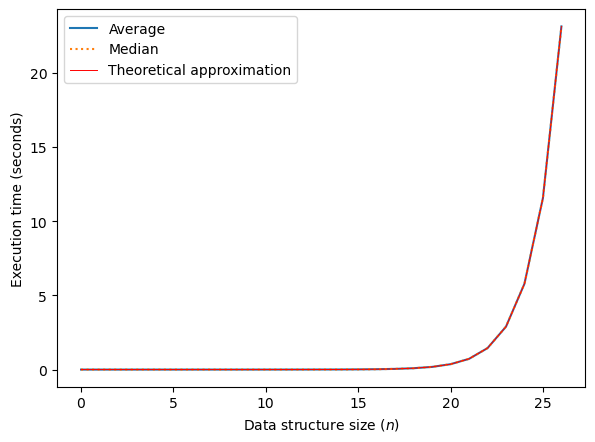

In [26]:
# run empirical time tests
m = metrics(5, partial(measure, 28, cut_rod))
plot(m, O_exp)

In [27]:
def O_n_squared(x: list[float], k: float) -> list[float]:
    return [k * x_i ** 2 for x_i in x]

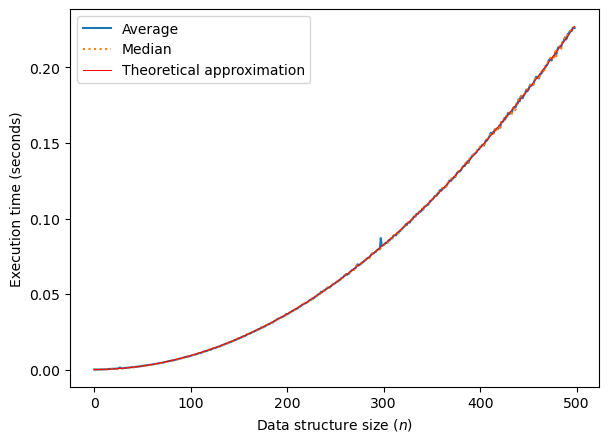

In [28]:
m1 = metrics(5, partial(measure, 500, memoization_cut_rod))
plot(m1, O_n_squared)

## Greed activity

### Dynamic programming approach

In [34]:
s = [1, 3, 0, 5, 3, 5, 6, 8, 8, 2, 12]
f = [4, 5, 6, 7, 9, 9, 10, 11, 12, 14, 16]
a = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]

def greed_activity_dp(activities):
    L = [0] * len(activities)
    for i in range(len(activities)):
        for j in range(i):
            if activities[j][1] < activities[i][0] and L[i] < L[j]:
                L[i] = L[j]
        L[i] = L[i] + 1
    return max(L)
activities = list(zip(s, f))

print(greed_activity_dp(activities))

4


### Greedy approach

In [33]:
def greed_activity_selector(s, f):
    
    n = len(s)
    A = [1]
    k = 0
    for m in range(1, n):
        if s[m] >= f[k]:
            A.append(m+1)
            k = m
    return A

print(greed_activity_selector(s,f))

[1, 4, 8, 11]


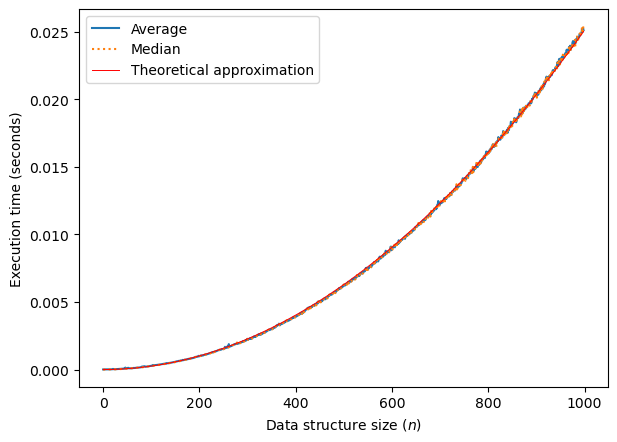

In [37]:
def vector_activities_dp(n):
    add_rand = lambda x: x + random.randint(1, 1000)
    s = np.random.randint(100, size=n)
    f = map(add_rand, s)
    test = list(zip(s,f))
    sorted(test, key=lambda x: x[1] )
    return test

def measure_greed_dp(n: int, fn: Callable[[list[float]], Any]) -> list[float]:
    # For each iteration k:
    #                       1) Generate vector of length k
    #                       2) Measure current CPU time
    #                       3) Evaluate function
    #                       4) Measure current CPU time
    
    tmp = [[v := vector_activities_dp(k), process_time(), fn(v), process_time()] for k in range(1, n)]
    
    # CPU time diff
    return [each[3] - each[1] for each in tmp]

m2 = metrics(5, partial(measure_greed_dp, 1000, greed_activity_dp))
plot(m2, O_n_squared)

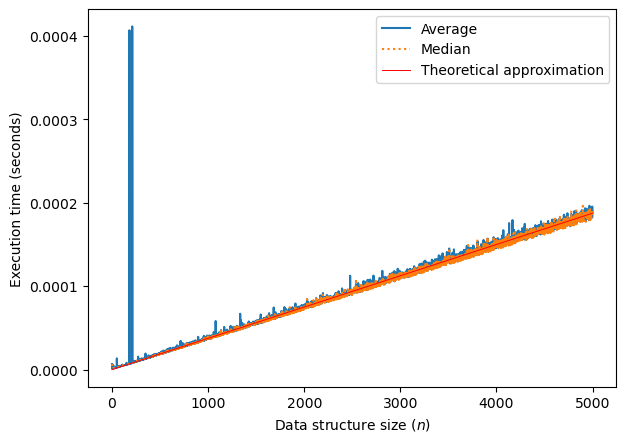

In [31]:
def O_n(x, k):
    return [k * x_i for x_i in x]

def vector_activities(n: int) -> list:
    add_rand = lambda x: x + random.randint(1, 1000)
    s = np.random.randint(100, size=n)
    f = map(add_rand, s)
    test = list(zip(s, f))
    
    sorted(test, key=lambda x: x[1])
    res = [
        [ i for i, j in test ],
        [ j for i, j in test ]
    ]
    
    return res

def measure_greed(n: int, fn: Callable[[list[float]], Any]) -> list[float]:
    # For each iteration k:
    #                       1) Generate vector of length k
    #                       2) Measure current CPU time
    #                       3) Evaluate function
    #                       4) Measure current CPU time
    
    tmp = [[v := vector_activities(k), process_time(), fn(v[0], v[1]), process_time()] for k in range(1, n)]
    
    # CPU time diff
    return [each[3] - each[1] for each in tmp]

m3 = metrics(5, partial(measure_greed, 5000, greed_activity_selector))
plot(m3, O_n)
